# dependencias

In [1]:
import pandas as pd
import os
import sys
ruta_carpeta = os.path.abspath('../src')
if ruta_carpeta not in sys.path:
    sys.path.append(ruta_carpeta)
import scipy.stats as stats
import utilidades as ut
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# lectura de datos 

In [2]:
datos_sem = pd.read_csv('../input/datos_semanales.csv').drop(columns=['Unnamed: 0'])
## guardar los datos de en csv
datos_sem.to_csv('../input/datos_semanales.csv')

In [3]:
datos_sem.head()

,group,pro_inter,pro_homic,pro_maxtemp,pro_humid,pro_precip,pro_luna,total_festivos,pro_multas,pro_indexheat,out_pro_multas,out_pro_homic,out_pro_humid,out_pro_indexheat,out_pro_inter,out_pro_maxtemp,out_pro_precip
0,1,9.000000,1.142857,32.714286,80.714286,0,0.836571,1,3.714286,29.806729,0,0,0,0,0,0,0
1,2,7.142857,1.571429,31.571429,76.000000,0,0.210286,1,5.285714,30.552386,0,0,0,0,0,0,0
2,3,8.714286,2.142857,32.857143,76.714286,0,0.085429,0,5.714286,31.078186,0,1,0,0,0,0,0
3,4,8.714286,0.428571,33.571429,77.857143,0,0.631571,0,5.285714,31.758986,0,0,0,0,0,0,0
4,5,9.142857,0.857143,32.571429,75.571429,0,0.912571,0,5.428571,31.160600,0,0,0,0,0,0,0


# Series individuales
modelos individuales para las variables exogenas

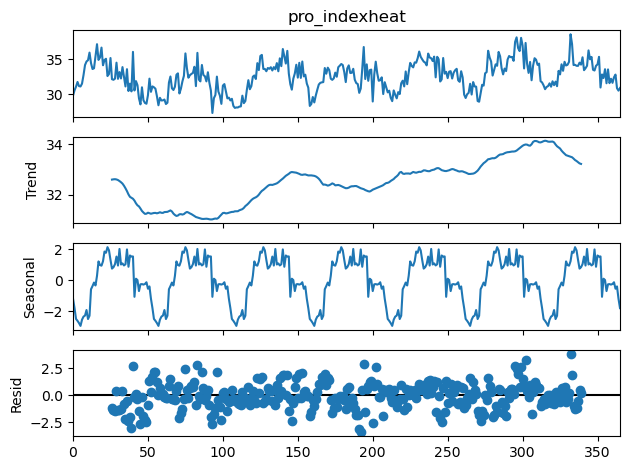

In [4]:
result = seasonal_decompose(datos_sem['pro_indexheat'], model='additive', period=52)
result.plot()
plt.show()

In [5]:
help(seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages.

    Parameters
    ----------
    x : array_like
        Time series. If 2d, individual series are in columns. x must contain 2
        complete cycles.
    model : {"additive", "multiplicative"}, optional
        Type of seasonal component. Abbreviations are accepted.
    filt : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
    period : int, optional
        Period of the series (e.g., 1 for annual, 4 for quarterly, etc). Must
        be used if x is not a pandas object or if the index of x does not have
        a frequency. Overrides default periodicity of x if x is a pandas
        object with a timeseries index.
    t

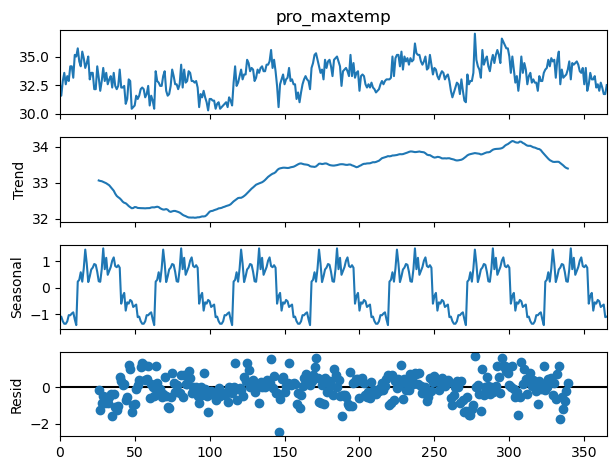

In [6]:
result = seasonal_decompose(datos_sem['pro_maxtemp'], model='additive', period=52)
result.plot()
plt.show()

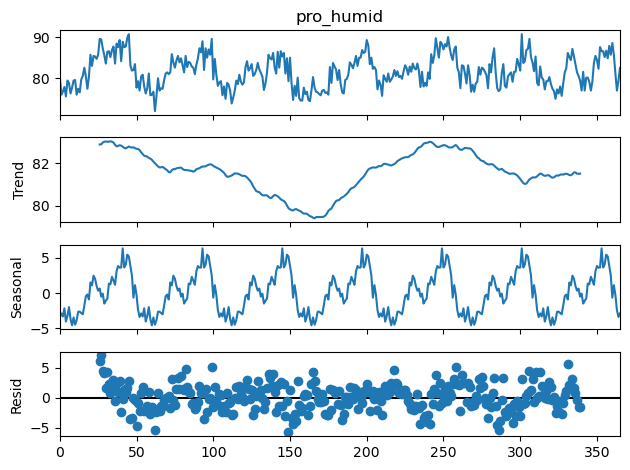

In [7]:
result = seasonal_decompose(datos_sem['pro_humid'], model='additive', period=52)
result.plot()
plt.show()

diferencia estacional  para deteccion de atipicos


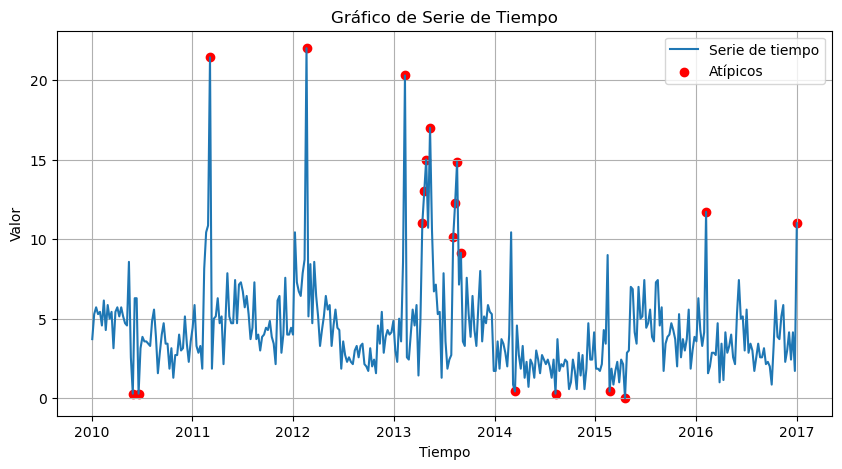

21      0.285714
24      0.285714
61     21.428571
111    22.000000
162    20.285714
171    11.000000
172    13.000000
173    15.000000
175    17.000000
187    10.142857
188    12.285714
189    14.857143
191     9.142857
219     0.428571
240     0.285714
268     0.428571
276     0.000000
318    11.714286
365    11.000000
Name: pro_multas, dtype: float64

In [8]:
ut.plot_time_series(datos_sem['pro_multas'], 2010, 'W', detect_outliers=True)

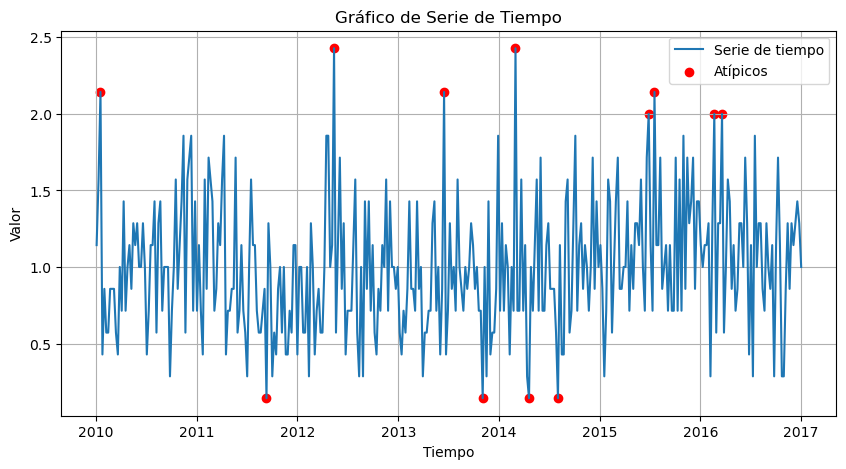

2      2.142857
88     0.142857
123    2.428571
180    2.142857
200    0.142857
217    2.428571
224    0.142857
239    0.142857
286    2.000000
289    2.142857
320    2.000000
324    2.000000
Name: pro_homic, dtype: float64

In [9]:
ut.plot_time_series(datos_sem['pro_homic'], 2010, 'W', detect_outliers=True)

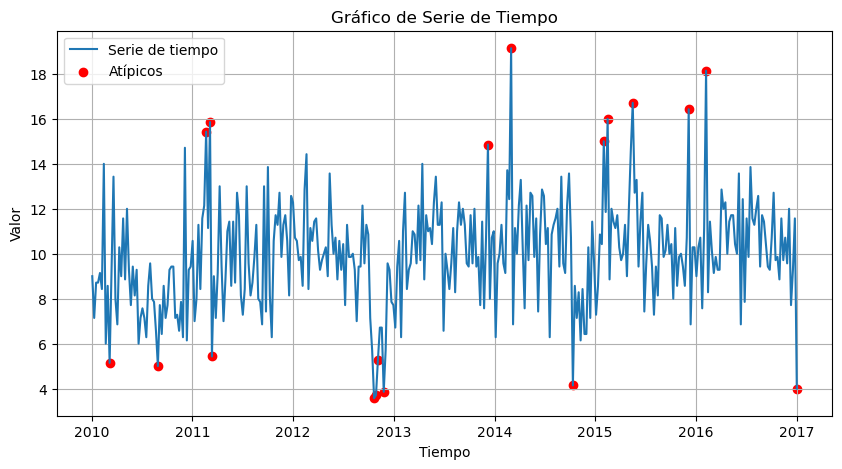

9       5.142857
34      5.000000
59     15.428571
61     15.857143
62      5.428571
146     3.571429
147     3.714286
148     5.285714
151     3.857143
205    14.857143
217    19.142857
249     4.142857
265    15.000000
267    16.000000
280    16.714286
309    16.428571
318    18.142857
365     4.000000
Name: pro_inter, dtype: float64

In [10]:
ut.plot_time_series(datos_sem['pro_inter'], 2010, 'W', detect_outliers=True)

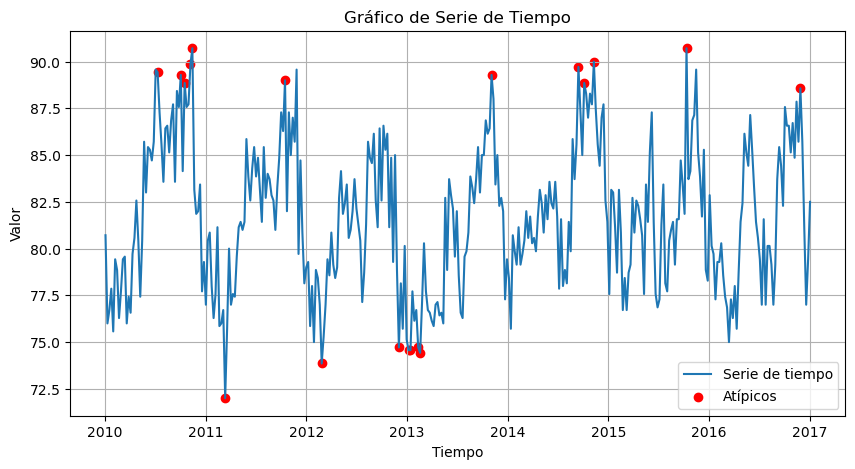

27     89.428571
39     89.285714
41     88.857143
44     89.857143
45     90.714286
62     72.000000
93     89.000000
112    73.857143
152    74.714286
157    74.571429
158    74.571429
162    74.714286
163    74.428571
200    89.285714
245    89.714286
248    88.857143
253    90.000000
301    90.714286
360    88.571429
Name: pro_humid, dtype: float64

In [11]:
ut.plot_time_series(datos_sem['pro_humid'], 2010, 'W', detect_outliers=True)

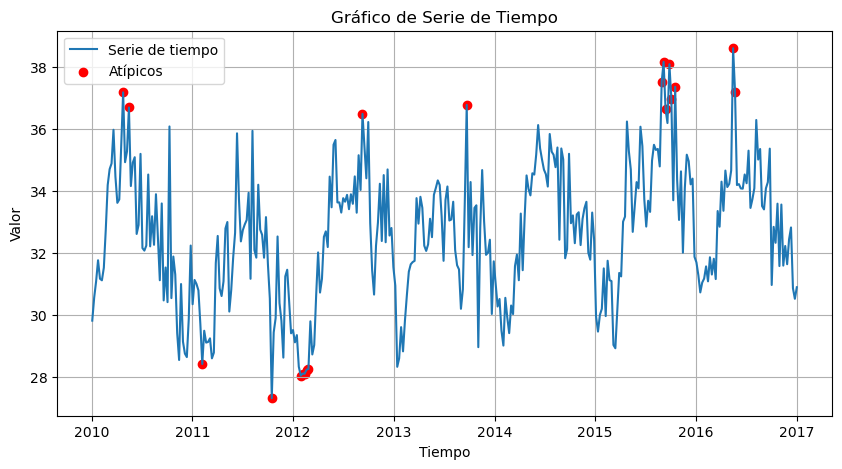

16     37.187543
19     36.697943
57     28.406871
93     27.298443
108    28.031671
109    28.095957
110    28.091229
111    28.218443
112    28.245871
140    36.491971
194    36.782214
295    37.525029
296    38.171586
297    36.640971
299    38.095800
300    36.986357
302    37.367743
332    38.613800
333    37.213071
Name: pro_indexheat, dtype: float64

In [12]:
ut.plot_time_series(datos_sem['pro_indexheat'], 2010, 'W', detect_outliers=True)

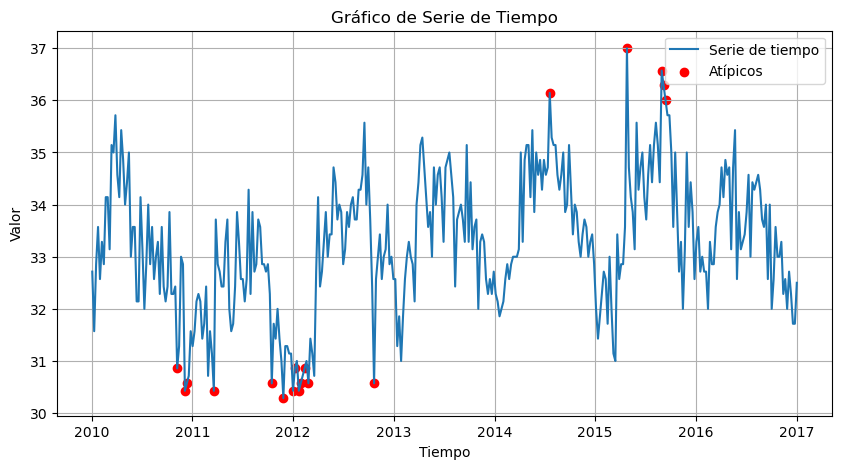

44     30.857143
48     30.428571
49     30.571429
63     30.428571
93     30.571429
99     30.285714
104    30.428571
105    30.857143
107    30.428571
108    30.571429
110    30.857143
112    30.571429
146    30.571429
237    36.142857
277    37.000000
295    36.571429
296    36.285714
297    36.000000
Name: pro_maxtemp, dtype: float64

In [13]:
ut.plot_time_series(datos_sem['pro_maxtemp'], 2010, 'W', detect_outliers=True)

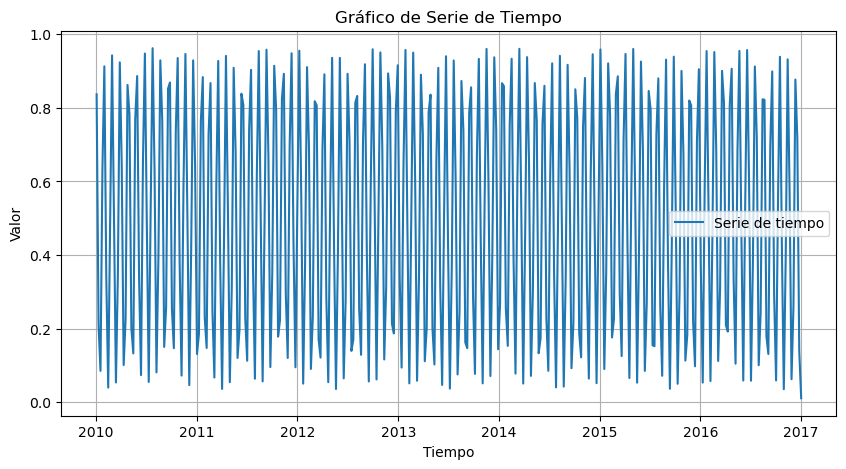

In [14]:
ut.plot_time_series(datos_sem['pro_luna'], 2010, 'W')

In [15]:
# convertimos a 1 todo lo que sea mayo que 0
datos_sem['pro_precip'] = datos_sem['pro_precip'].apply(lambda x: 1 if x > 0 else 0)
datos_sem['pro_precip'].value_counts()

pro_precip
0    187
1    179
Name: count, dtype: int64

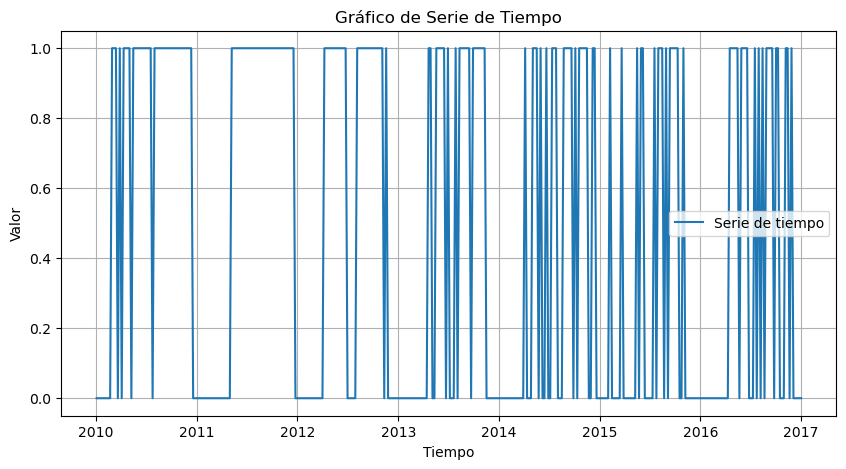

In [16]:
ut.plot_time_series(datos_sem['pro_precip'], 2010, 'W')

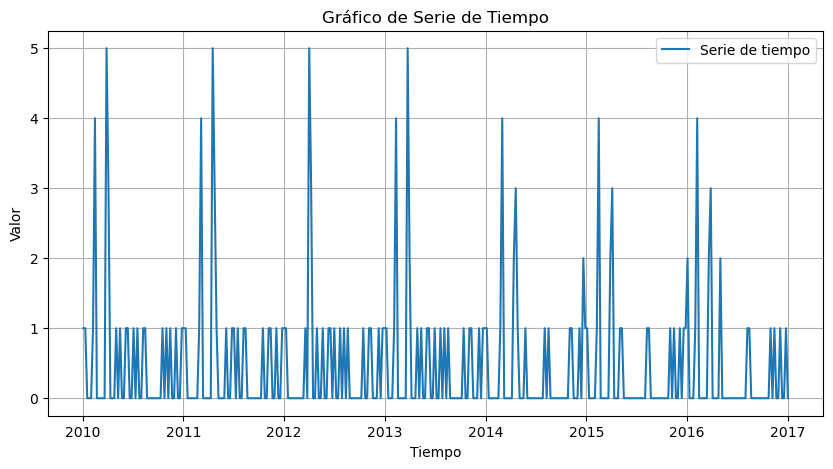

In [17]:
ut.plot_time_series(datos_sem['total_festivos'], 2010, 'W')

# Preblanqueo
en esta seccion se trata de averiguar que resagos son importantes para explicar el comportamiento actual 

In [18]:
from statsmodels.tsa.stattools import adfuller
xd = datos_sem['pro_multas']
decomposition = seasonal_decompose(xd, model='additive', period=52)

# Eliminar la tendencia y la estacionalidad
blan= xd - decomposition.trend - decomposition.seasonal

# Verificar estacionariedad
result = adfuller(blan.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.753594
p-value: 0.000000


In [19]:
datos_sem

,group,pro_inter,pro_homic,pro_maxtemp,pro_humid,pro_precip,pro_luna,total_festivos,pro_multas,pro_indexheat,out_pro_multas,out_pro_homic,out_pro_humid,out_pro_indexheat,out_pro_inter,out_pro_maxtemp,out_pro_precip
0,1,9.000000,1.142857,32.714286,80.714286,0,0.836571,1,3.714286,29.806729,0,0,0,0,0,0,0
1,2,7.142857,1.571429,31.571429,76.000000,0,0.210286,1,5.285714,30.552386,0,0,0,0,0,0,0
2,3,8.714286,2.142857,32.857143,76.714286,0,0.085429,0,5.714286,31.078186,0,1,0,0,0,0,0
3,4,8.714286,0.428571,33.571429,77.857143,0,0.631571,0,5.285714,31.758986,0,0,0,0,0,0,0
4,5,9.142857,0.857143,32.571429,75.571429,0,0.912571,0,5.428571,31.160600,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,362,12.000000,1.142857,32.714286,85.714286,0,0.260786,1,4.142857,32.437643,0,0,0,0,0,0,0
362,363,7.714286,1.285714,32.285714,81.142857,0,0.876771,0,2.428571,32.819314,0,0,0,0,0,0,0
363,364,9.285714,1.428571,31.714286,77.000000,0,0.716971,0,4.142857,30.855914,0,0,0,0,0,0,0
364,365,11.571429,1.285714,31.714286,79.428571,0,0.139986,1,1.714286,30.511800,0,0,0,0,0,0,0


# modelamiento

para el modelamiento se van a probar dos metodologias LSTM que es un modelo el cual permite manejar diferentes variables ademas de mirar no tener problemas con con la no linealidad de los datos

Funciones para rezagos 


In [55]:
def create_sequences(data, target_cols, exog_cols, n_lags=3):
    X, Y = [], []
    for i in range(n_lags, len(data)):
        past_values = data.iloc[i-n_lags:i][target_cols].values  # Rezagos de variables objetivo
        past_exog = data.iloc[i-n_lags:i][exog_cols].values  # Variables exógenas
        X.append(np.hstack((past_values, past_exog)))  # Concatenar variables objetivo y exógenas rezagadas
        Y.append(data.iloc[i][target_cols].values)  # Variables objetivo
    return np.array(X), np.array(Y)

particion de los datos

In [56]:
# escalado de los datos
scaler = MinMaxScaler()
scaled_datos_sem = pd.DataFrame(scaler.fit_transform(datos_sem), columns=datos_sem.columns)

In [57]:
datos_sem.columns
# Index(['group', 'pro_inter', 'pro_homic', 'pro_maxtemp', 'pro_humid',
#        'pro_precip', 'pro_luna', 'total_festivos', 'pro_multas',
#        'pro_indexheat', 'out_pro_multas', 'out_pro_homic', 'out_pro_humid',
#        'out_pro_indexheat', 'out_pro_inter', 'out_pro_maxtemp',
#        'out_pro_precip'],
#       dtype='object')

Index(['group', 'pro_inter', 'pro_homic', 'pro_maxtemp', 'pro_humid',
       'pro_precip', 'pro_luna', 'total_festivos', 'pro_multas',
       'pro_indexheat', 'out_pro_multas', 'out_pro_homic', 'out_pro_humid',
       'out_pro_indexheat', 'out_pro_inter', 'out_pro_maxtemp',
       'out_pro_precip'],
      dtype='object')

In [58]:
datos_sem.shape

(366, 17)

In [59]:
target_cols = ['pro_multas','pro_homic','pro_inter']
exog_cols = ['pro_indexheat','pro_maxtemp','pro_humid','pro_precip','pro_luna','total_festivos','out_pro_indexheat','out_pro_maxtemp','out_pro_humid','out_pro_precip','out_pro_multas','out_pro_homic','out_pro_inter']

In [60]:
X, Y = create_sequences(scaled_datos_sem, target_cols, exog_cols, n_lags=5)

In [61]:
X.shape, Y.shape

((361, 5, 16), (361, 3))

particion de los datos en entrenamiento y prueba

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

In [63]:
X.shape, Y.shape

((361, 5, 16), (361, 3))

In [64]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((252, 5, 16), (109, 5, 16), (252, 3), (109, 3))

modelo basico

In [65]:
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    #Dropout(0.4),
    Dense(3)  # 3 salidas para las 3 variables objetivo
])

c:\Users\bcriv\miniconda3\envs\series_de_tiempo\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [66]:
model.compile(optimizer='adam', loss='mse')

In [67]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=16, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1072 - val_loss: 0.0509
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0412 - val_loss: 0.0251
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0296 - val_loss: 0.0245
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0274 - val_loss: 0.0247
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0266 - val_loss: 0.0225
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0245 - val_loss: 0.0229
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0278 - val_loss: 0.0231
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0234 - val_loss: 0.0229
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - val_loss: 0.0236
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - val_loss: 0.0232
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0235 - val_loss: 0.0216
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0242 - val_l

In [68]:
Y_pred = model.predict(X_test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000012EA01827A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


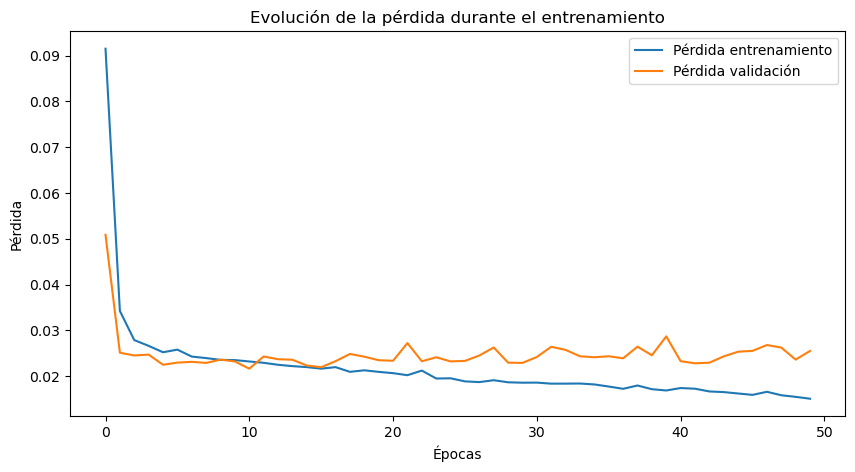

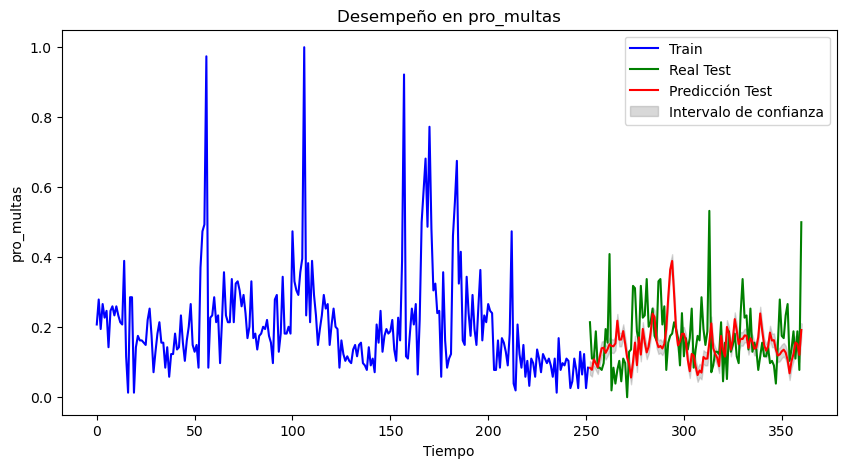

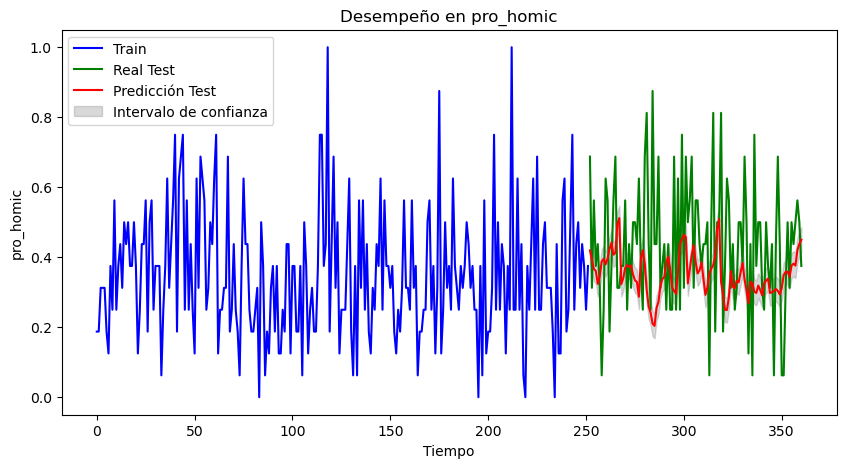

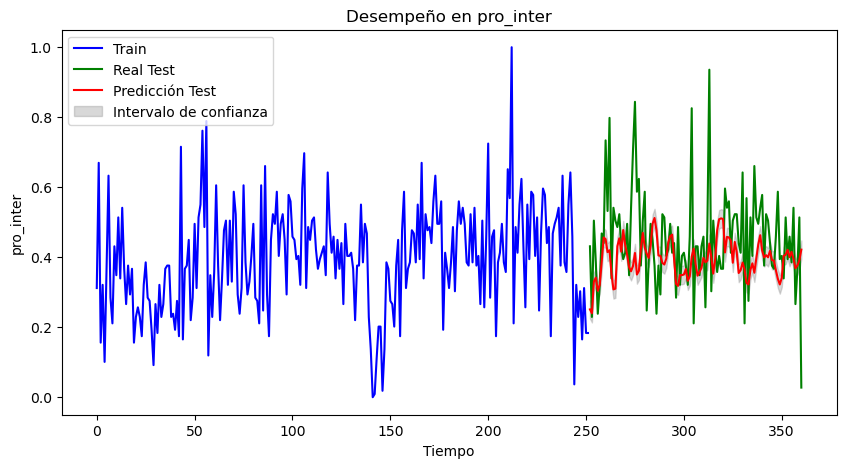

In [69]:
# Calcular intervalo de confianza (asumiendo distribución normal)
error_std = np.std(Y_test - Y_pred, axis=0)
conf_interval = 1.96 * error_std / np.sqrt(len(Y_test))

# Graficar la pérdida del entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.show()

# Graficar el desempeño en el conjunto de prueba con intervalo de confianza
for i, target in enumerate(target_cols):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(Y_train)), Y_train[:, i], label='Train', color='blue')
    plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)), Y_test[:, i], label='Real Test', color='green')
    plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)), Y_pred[:, i], label='Predicción Test', color='red')
    plt.fill_between(range(len(Y_train), len(Y_train) + len(Y_test)), 
                     Y_pred[:, i] - conf_interval[i], 
                     Y_pred[:, i] + conf_interval[i], 
                     color='gray', alpha=0.3, label='Intervalo de confianza')
    plt.xlabel('Tiempo')
    plt.ylabel(target)
    plt.legend()
    plt.title(f'Desempeño en {target}')
    plt.show()


In [70]:
from sklearn.metrics import mean_squared_error

# Calcular el MSE para cada variable de salida
mse_values = {target: mean_squared_error(Y_test[:, i], Y_pred[:, i]) for i, target in enumerate(target_cols)}

# Imprimir los valores de MSE
for target, mse in mse_values.items():
    print(f"MSE para {target}: {mse:.5f}")


MSE para pro_multas: 0.01094
MSE para pro_homic: 0.04279
MSE para pro_inter: 0.02276


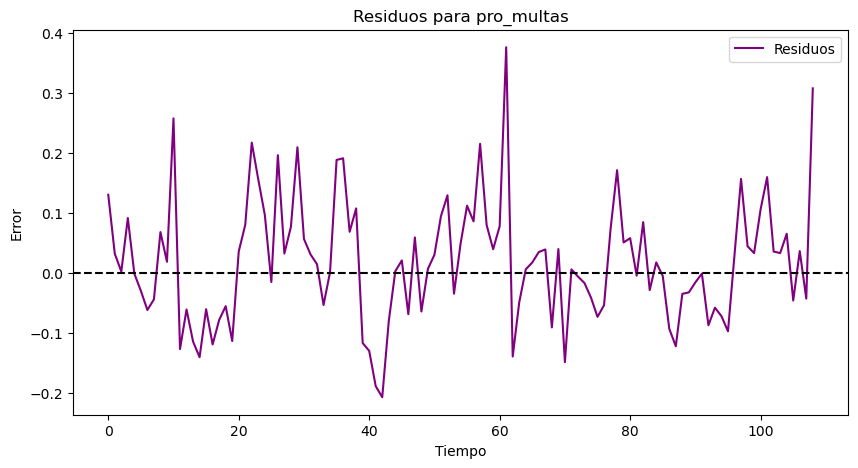

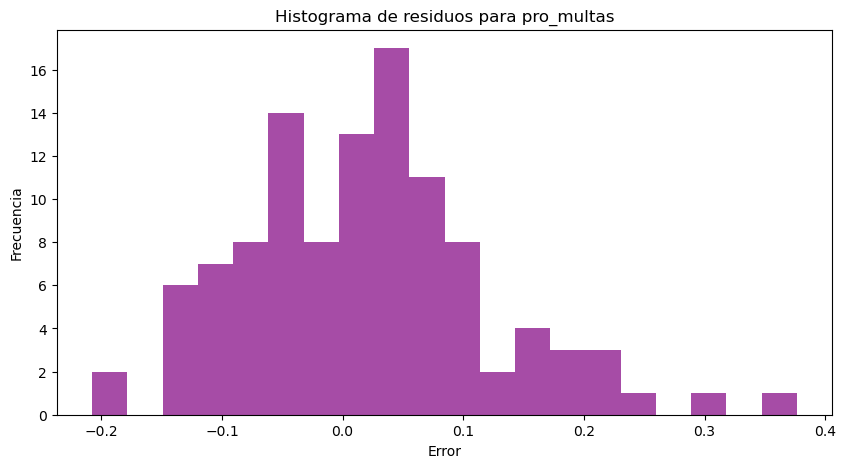

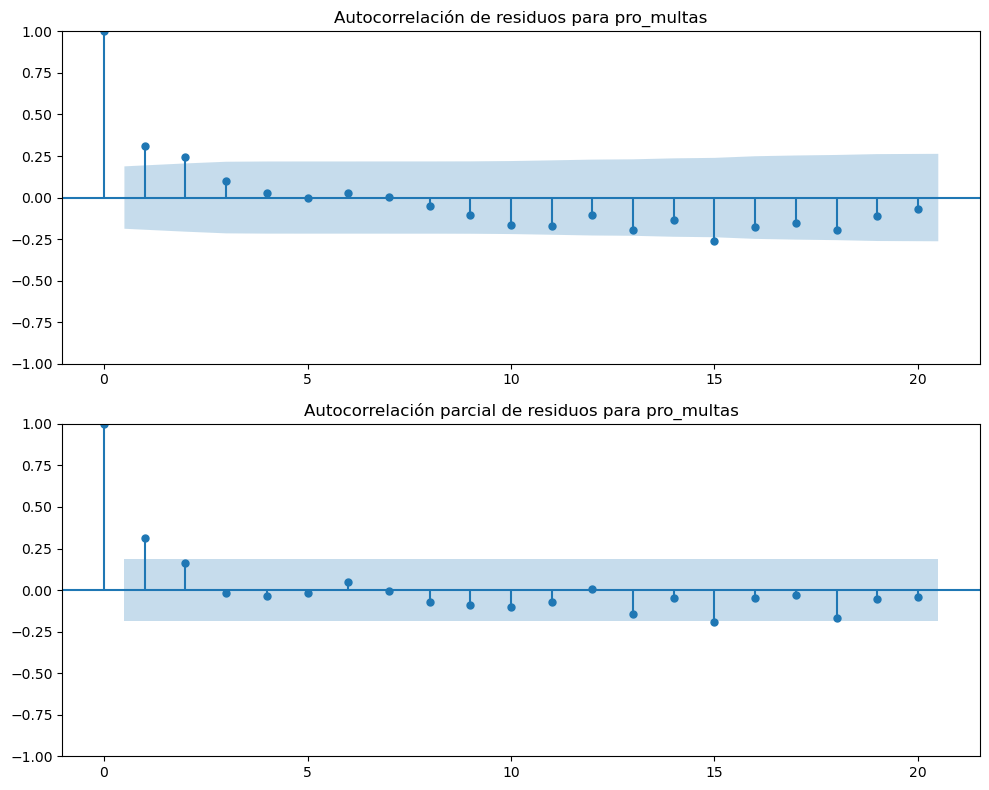

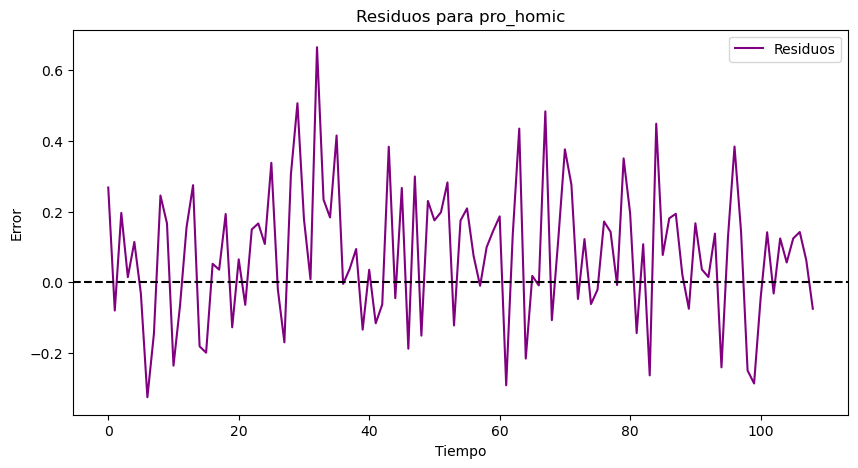

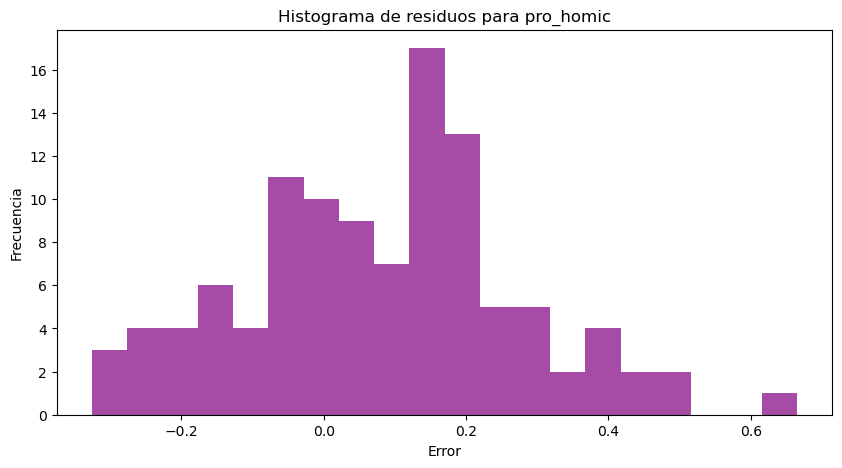

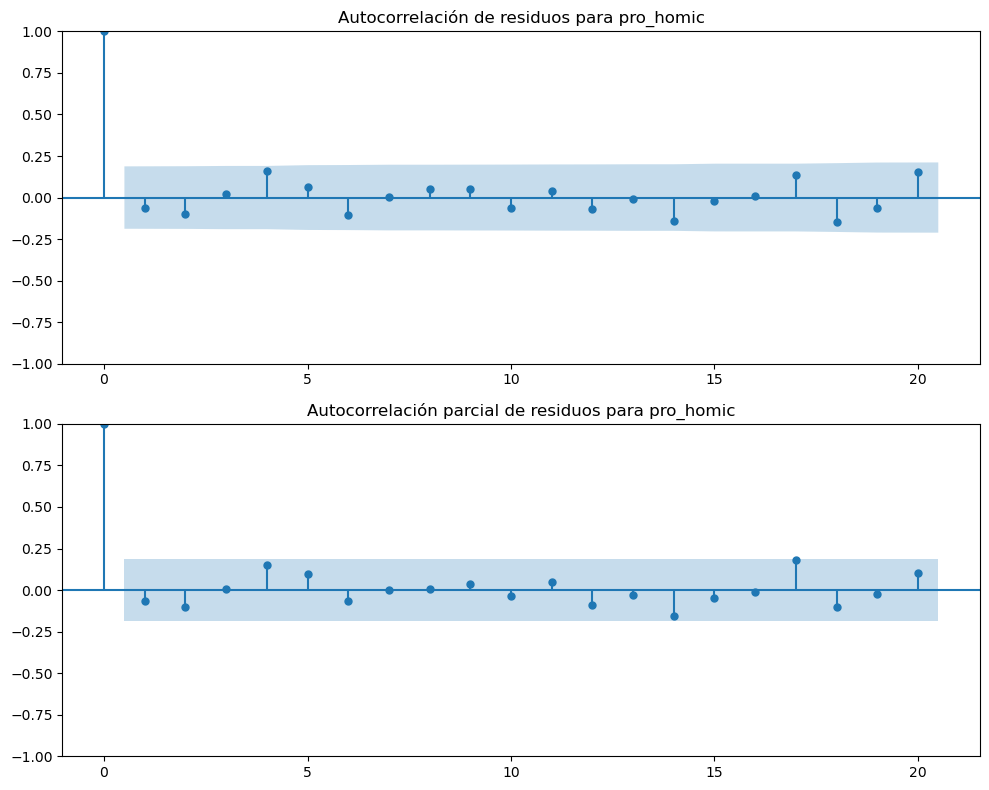

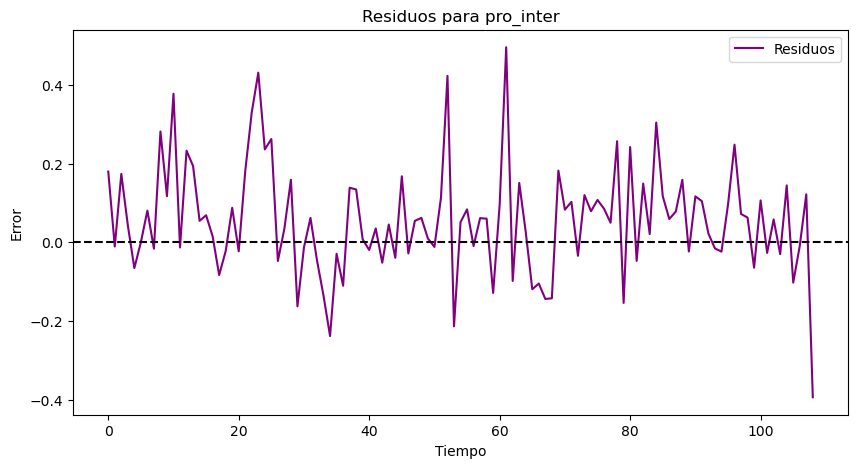

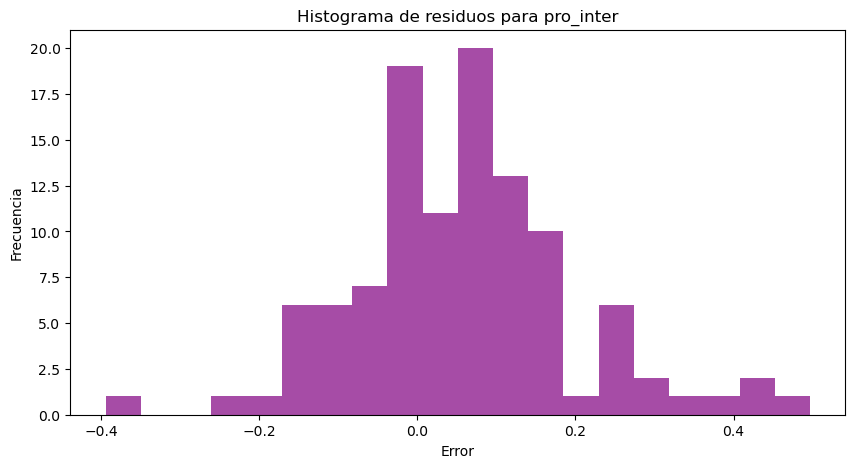

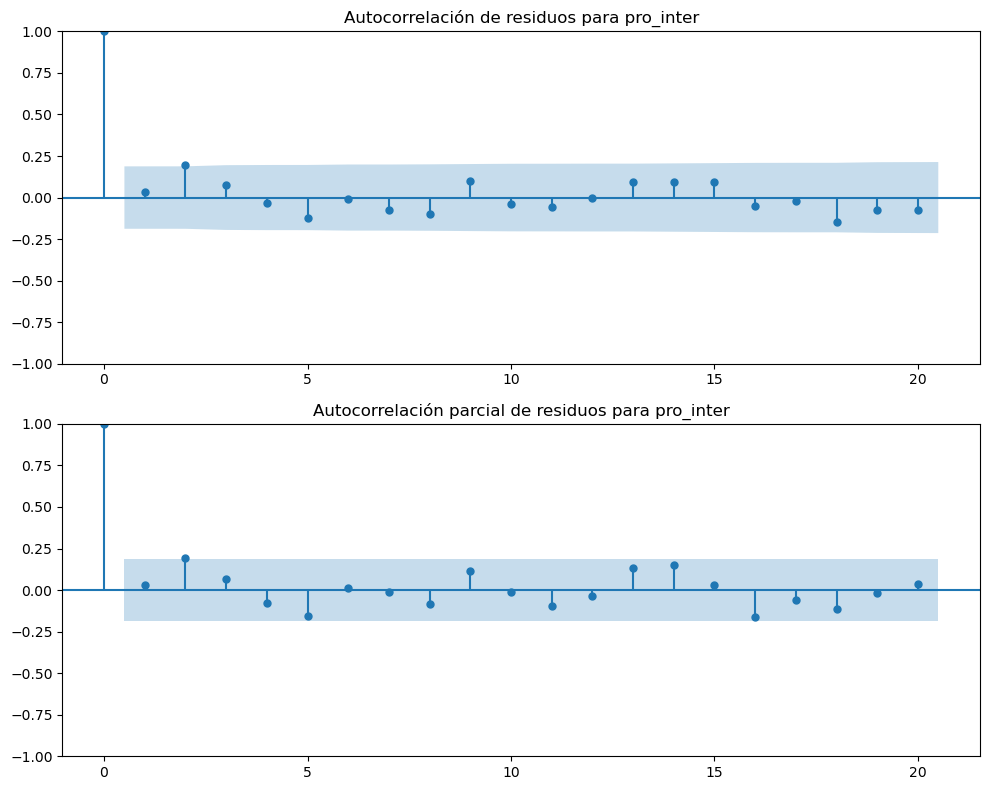

In [71]:
# Graficar los residuos
for i, target in enumerate(target_cols):
    residuals = Y_test[:, i] - Y_pred[:, i]
    plt.figure(figsize=(10, 5))
    plt.plot(residuals, label='Residuos', color='purple')
    plt.axhline(0, linestyle='--', color='black')
    plt.xlabel('Tiempo')
    plt.ylabel('Error')
    plt.title(f'Residuos para {target}')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 5))
    plt.hist(residuals, bins=20, color='purple', alpha=0.7)
    plt.xlabel('Error')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de residuos para {target}')
    plt.show()
    
    # ACF y PACF de los residuos
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    sm.graphics.tsa.plot_acf(residuals, lags=20, ax=ax[0])
    sm.graphics.tsa.plot_pacf(residuals, lags=20, ax=ax[1])
    ax[0].set_title(f'Autocorrelación de residuos para {target}')
    ax[1].set_title(f'Autocorrelación parcial de residuos para {target}')
    plt.tight_layout()
    plt.show()